# Red Wine Quality Prediction Project

# Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


# Attribute Information
Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 


# Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!


# Dataset Link-

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# Exploratory Data Analysis EDA 

In [5]:
df.shape

(1599, 12)

The red wine quality dataset contains 1599 rows and 12 columns. One column is a target variable (quality), 11 are indepemdent variables.

In [6]:
#Checking the names of the columns

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
#Checking the column types

df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As we can see from the above, there is no null values present in this dataset.

<Axes: >

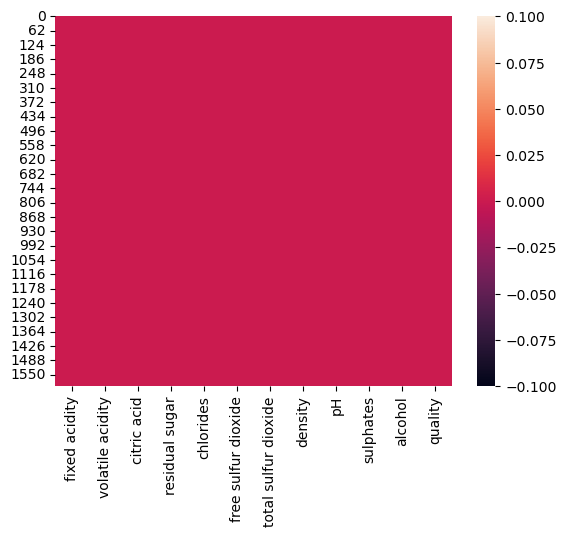

In [9]:
#We can also use heatmap to visualize if there is any null values presented

sns.heatmap(df.isnull())

We can clearly see that there is no any null values presented in this dataset.

# Statistical Summary

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Key observation:
    
1. The mean is more than median(50th percentile) in all columns.
2. There is a large difference in 75th percentile and the max residual sugar, free sulfur dioxide, total sulfur dioxide.
3. The 1st and 2nd observations suggest that there are extreme outliers present in these three columns.

# Exploring  data variable

In [11]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

The target (dependent) variable is categorical in nature.

Quality score scale ranges are from 3 to 8. Where 7 or higher is classified as 'good/1' and the remainder as 'not good/0'.


In [12]:
df['scorequality'] = [1 if x >= 7 else 0 for x in df['quality']]

In [13]:
df['scorequality'].value_counts()

0    1382
1     217
Name: scorequality, dtype: int64

Observations:
    
1. The majority of wine samples are classified as 'not good/0' quality - 1382 samples
2. Only 217 wine samples are classified as 'good/1' quality.

# Data Visualization

In [14]:
#Checking the correlation

dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,scorequality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485


<Axes: >

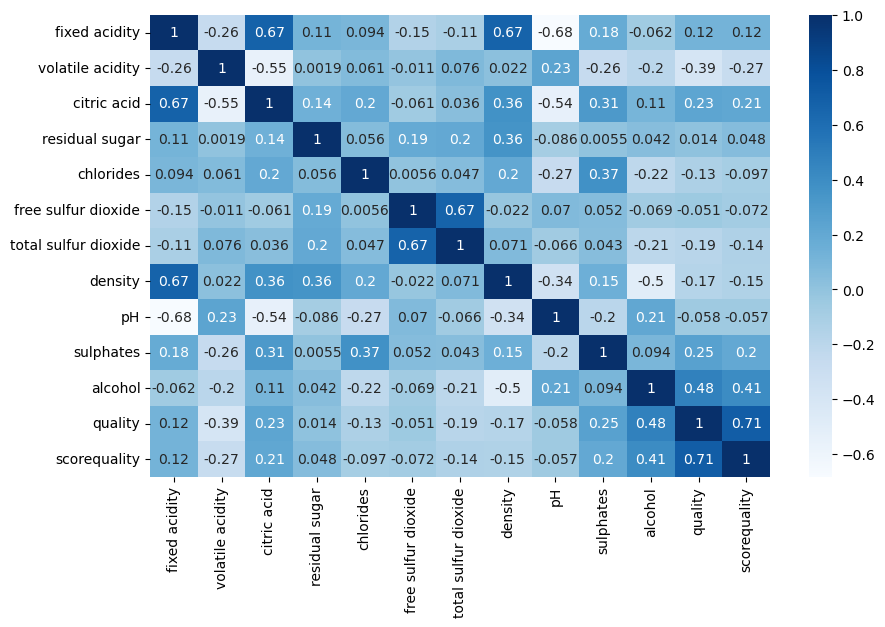

In [15]:
#To understand the correlation better let's visualize it using heatmap

plt.figure(figsize=(10,6))
sns.heatmap(dfcor, cmap='Blues', annot=True)

DISTRIBUTION OF SKEWNESS

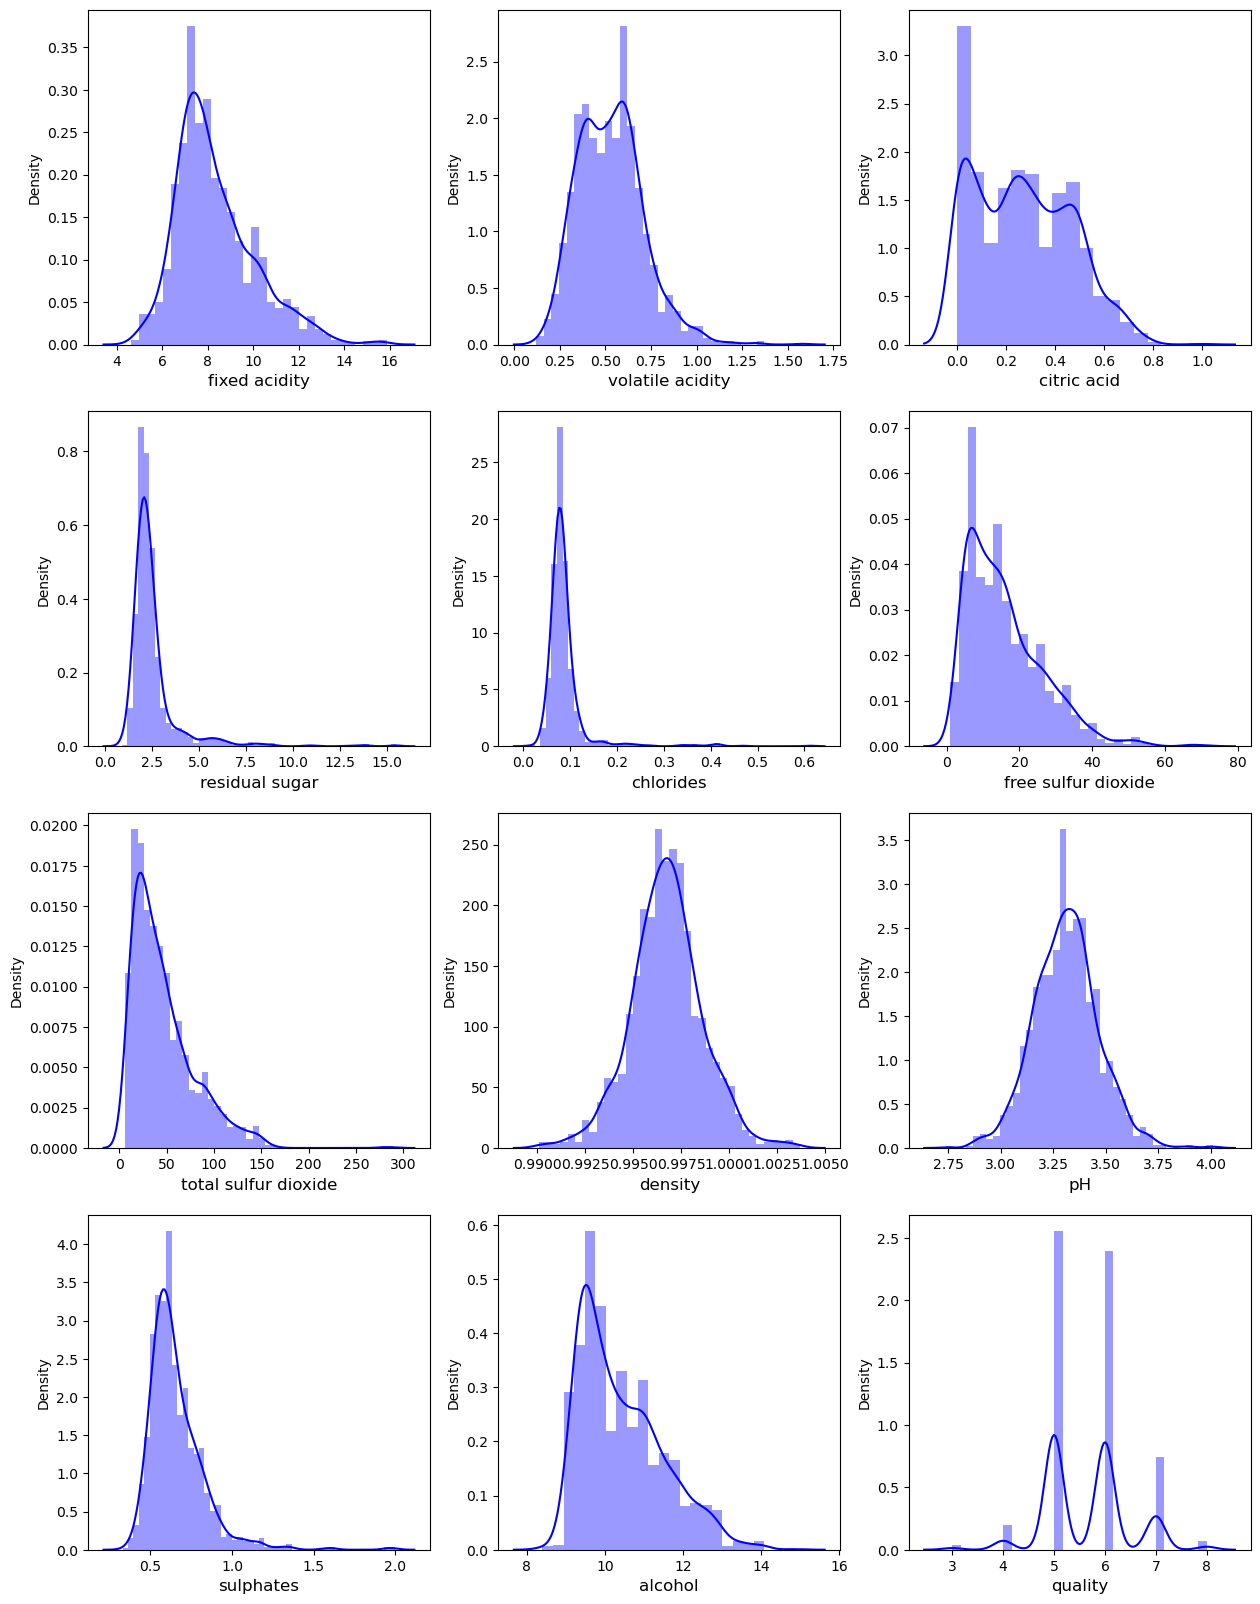

In [16]:
plt.figure(figsize=(15,20), facecolor='white')
plotnumber =1
for col in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[col], color='b')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

In [17]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
scorequality            2.129363
dtype: float64

There is skewness presented in the data.

PLOTTING OUTLIERS

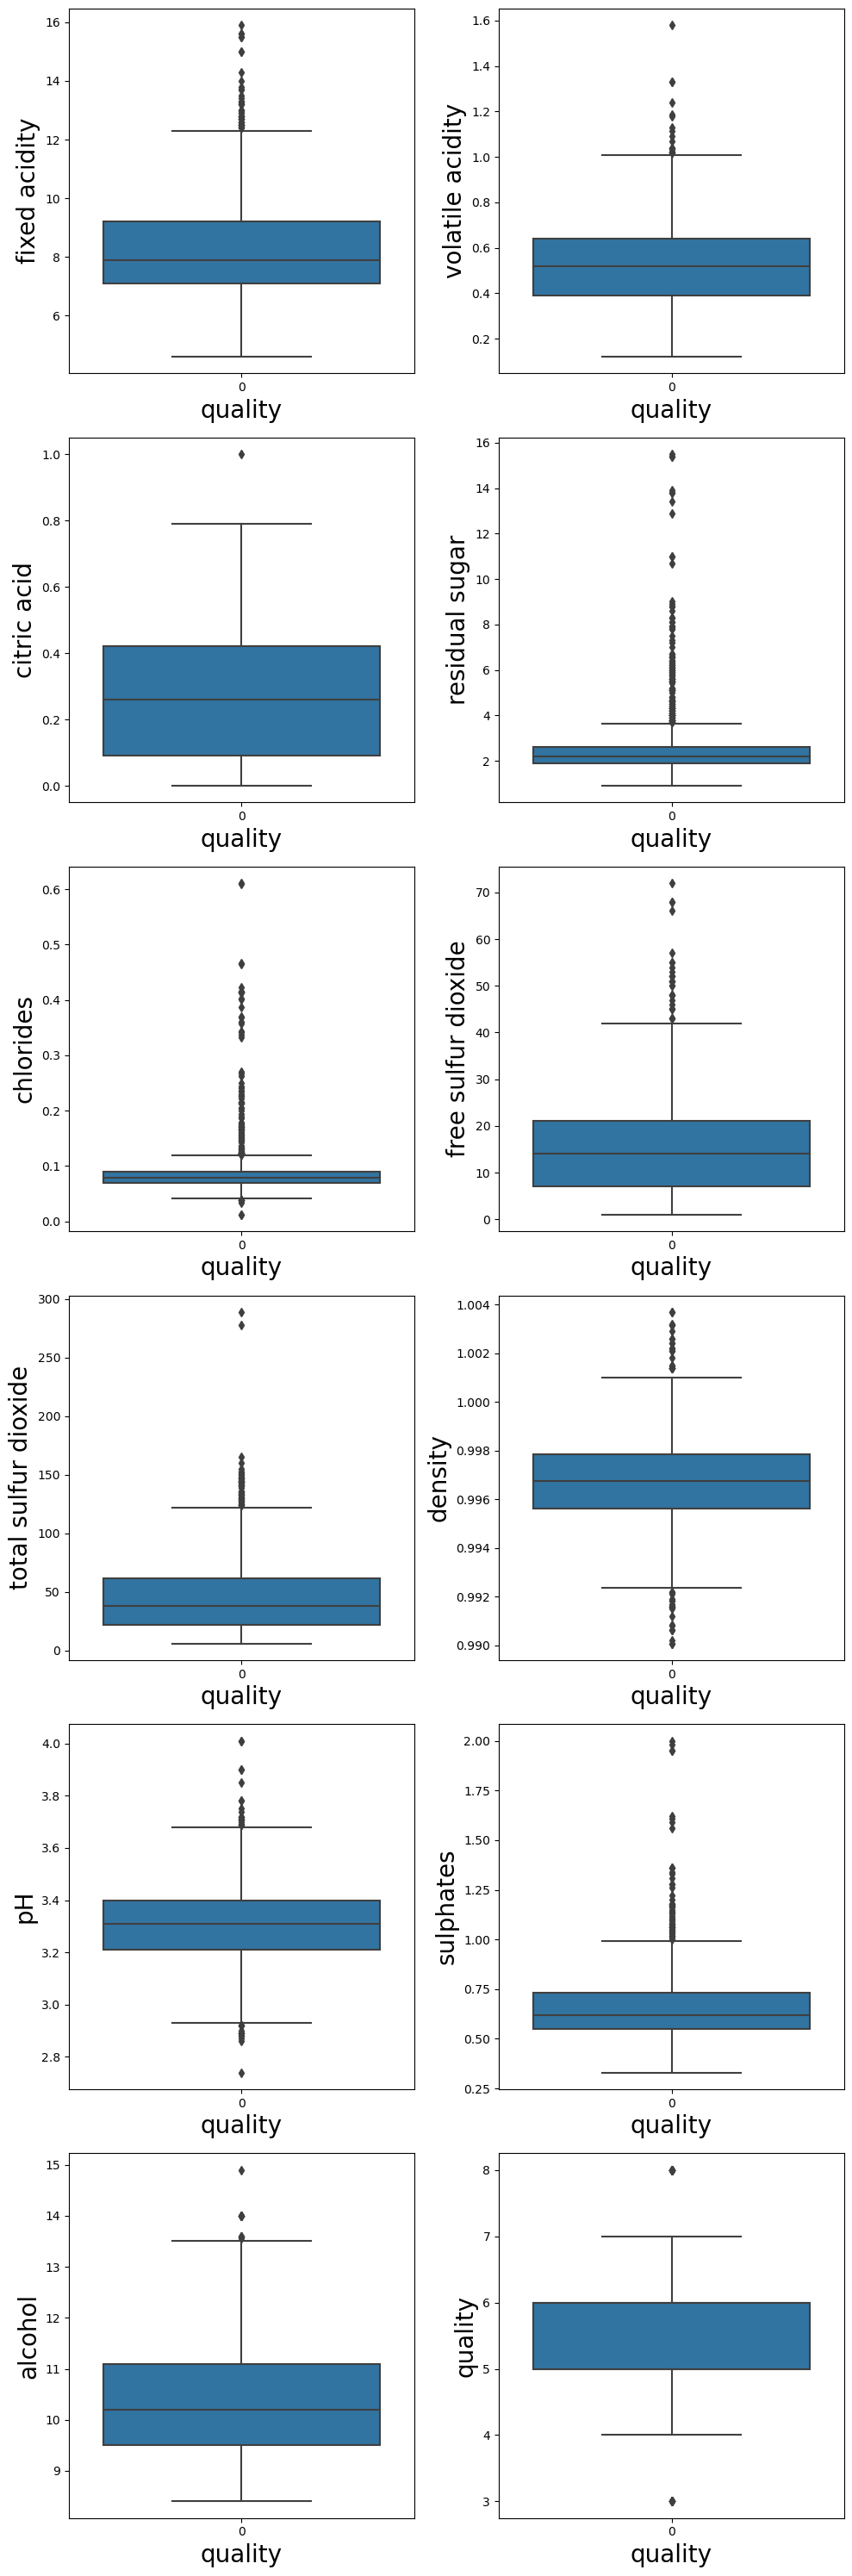

In [18]:
plt.figure(figsize=(10,30), facecolor='white')
plotnumber =1
for col in df:
    if plotnumber <=12:
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(df[col]) 
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(col, fontsize =20)
    plotnumber+=1
plt.tight_layout()

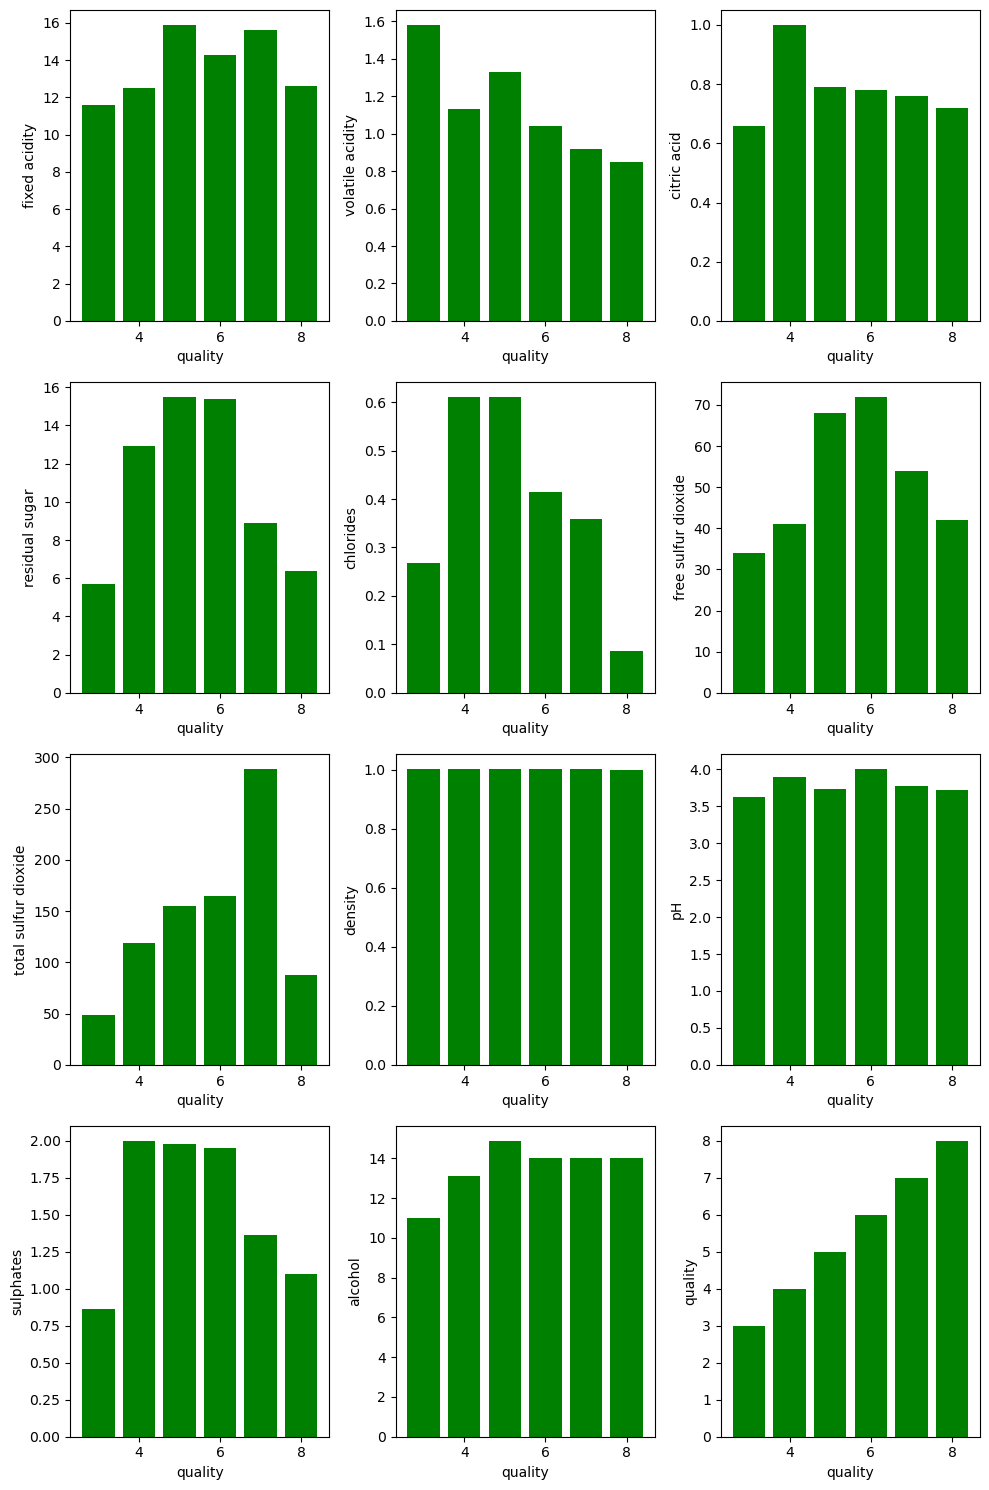

In [19]:
plt.figure(figsize=(10, 15))
plotnumber =1
for col in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        plt.bar(df['quality'], df[col], color='g') 
        plt.xlabel('quality',fontsize=10)
        plt.ylabel(col, fontsize =10)
    plotnumber+=1
plt.tight_layout()

Observation:
    
1. Density has no effect on quality of the wine.
2. Good quality wine has hight amount of alcohol and fixed acidity.
3. Good quality wine has low amount of vilatile acidity, citric acid, chlorides.
4. Low quality wine has low amount of total sulfur dioxide and hight amount of volatile acid.

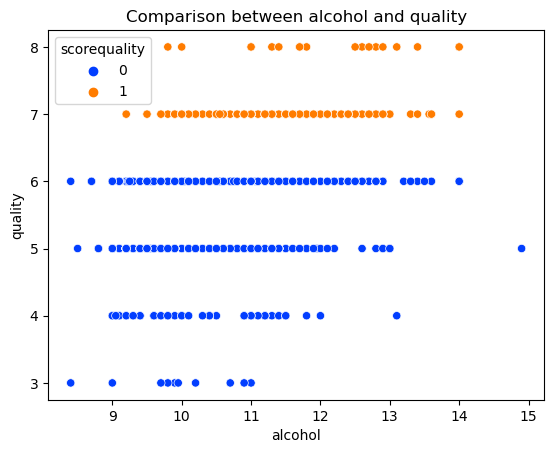

In [20]:
#Comparison between alcohol and 

plt.title('Comparison between alcohol and quality')
sns.scatterplot(x='alcohol', y='quality', data=df, hue='scorequality', palette='bright')
plt.show()

The higher the amount of the alcohol is the higher is the quality of the wine.

# Removing outliers

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,scorequality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823,0.396256
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823,0.396256
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823,0.396256
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848,0.396256
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823,0.396256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823,0.396256
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848,0.396256
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848,0.396256
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823,0.396256


In [22]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [23]:
df_new=df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,scorequality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [24]:
df_new.shape

(1451, 13)

In [25]:
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
scorequality            2.094941
dtype: float64

In [26]:
df_new.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,scorequality
fixed acidity,1.000000,-0.297150,0.698363,0.180293,0.183549,-0.148815,-0.099928,0.659927,-0.705572,0.200371,-0.015114,0.145163,0.125791
volatile acidity,-0.297150,1.000000,-0.589452,0.025977,0.072709,0.013943,0.110338,-0.004957,0.251343,-0.348126,-0.213213,-0.353443,-0.267836
citric acid,0.698363,-0.589452,1.000000,0.184960,0.100361,-0.074441,0.005301,0.371729,-0.520311,0.302815,0.168766,0.243999,0.227633
residual sugar,0.180293,0.025977,0.184960,1.000000,0.126735,-0.000844,0.095093,0.344801,-0.075140,0.076129,0.162533,0.061482,0.117036
chlorides,0.183549,0.072709,0.100361,0.126735,1.000000,-0.058163,0.045025,0.328695,-0.182841,0.022107,-0.205414,-0.108787,-0.112080
free sulfur dioxide,-0.148815,0.013943,-0.074441,-0.000844,-0.058163,1.000000,0.660188,-0.037630,0.108831,0.055956,-0.077993,-0.071202,-0.086402
total sulfur dioxide,-0.099928,0.110338,0.005301,0.095093,0.045025,0.660188,1.000000,0.118965,-0.005940,-0.039024,-0.259952,-0.237745,-0.172638
density,0.659927,-0.004957,0.371729,0.344801,0.328695,-0.037630,0.118965,1.000000,-0.312310,0.129896,-0.468312,-0.167568,-0.153031
pH,-0.705572,0.251343,-0.520311,-0.075140,-0.182841,0.108831,-0.005940,-0.312310,1.000000,-0.039082,0.135624,-0.082164,-0.079105
sulphates,0.200371,-0.348126,0.302815,0.076129,0.022107,0.055956,-0.039024,0.129896,-0.039082,1.000000,0.241636,0.386567,0.310432


As we noted above density has no effect on quality of the wine (the output) we can drop it.

In [27]:
df_new_new= df_new.drop(['density'], axis=1)

In [28]:
df_new_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,scorequality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2,5,0


# Machine Learning

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

### Creating train test split

In [30]:
x=df_new_new.iloc[:,0:-2]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4


In [31]:
y=df_new_new.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: scorequality, dtype: int64

In [32]:
x.shape

(1451, 10)

In [33]:
y.shape

(1451,)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33, random_state=42)

In [35]:
x_train.shape

(972, 10)

In [36]:
y_train.shape

(972,)

In [37]:
x_test.shape

(479, 10)

In [38]:
y_test.shape

(479,)

### Logistic Regression

In [39]:
lg=LogisticRegression()

In [40]:
lg.fit(x_train,y_train)

LogisticRegression()

In [41]:
#Prediction of wine quality

lgpred=lg.predict(x_test)
lgpred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [42]:
print('Accuracy Score of Logistics Regression: ', accuracy_score(y_test, lgpred))

Accuracy Score of Logistics Regression:  0.872651356993737


In [43]:
print(confusion_matrix(y_test, lgpred))

[[397  12]
 [ 49  21]]


In [44]:
print(classification_report(y_test,lgpred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       409
           1       0.64      0.30      0.41        70

    accuracy                           0.87       479
   macro avg       0.76      0.64      0.67       479
weighted avg       0.85      0.87      0.85       479



### GaussianNB

In [45]:
gnb=GaussianNB()

In [46]:
gnb.fit(x_train,y_train)

GaussianNB()

In [47]:
#Predicted values of the quality of the wine

gnbpred=gnb.predict(x_test)
gnbpred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [48]:
print('Accuracy Score of GaussianNB: ', accuracy_score(y_test, gnbpred))

Accuracy Score of GaussianNB:  0.8308977035490606


In [49]:
print(confusion_matrix(y_test, gnbpred))

[[356  53]
 [ 28  42]]


In [50]:
print(classification_report(y_test,gnbpred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       409
           1       0.44      0.60      0.51        70

    accuracy                           0.83       479
   macro avg       0.68      0.74      0.70       479
weighted avg       0.86      0.83      0.84       479



### KNN

In [51]:
knn=KNeighborsClassifier(n_neighbors=13)

In [52]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [53]:
knnpred=knn.predict(x_test)
knnpred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
print('Accuracy Score of KNN: ', accuracy_score(y_test, knnpred))

Accuracy Score of KNN:  0.8643006263048016


In [55]:
print(confusion_matrix(y_test, knnpred))

[[408   1]
 [ 64   6]]


In [56]:
print(classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       409
           1       0.86      0.09      0.16        70

    accuracy                           0.86       479
   macro avg       0.86      0.54      0.54       479
weighted avg       0.86      0.86      0.81       479



### Decision Tree

In [57]:
dtc=DecisionTreeClassifier()

In [58]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
dtcpred=dtc.predict(x_test)
dtcpred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [60]:
print('Accuracy Score of Decision Tree Classifier: ', accuracy_score(y_test, dtcpred))

Accuracy Score of Decision Tree Classifier:  0.8643006263048016


In [61]:
print(confusion_matrix(y_test, dtcpred))

[[377  32]
 [ 33  37]]


In [62]:
print(classification_report(y_test,dtcpred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       409
           1       0.54      0.53      0.53        70

    accuracy                           0.86       479
   macro avg       0.73      0.73      0.73       479
weighted avg       0.86      0.86      0.86       479



### Support Vector Classifier

In [63]:
svc=SVC()

In [64]:
svc.fit(x_train,y_train)

SVC()

In [65]:
svcpred=svc.predict(x_test)
svcpred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
print('Accuracy Score of SVC: ', accuracy_score(y_test, svcpred))

Accuracy Score of SVC:  0.8538622129436325


In [67]:
print(confusion_matrix(y_test, svcpred))

[[409   0]
 [ 70   0]]


In [68]:
print(classification_report(y_test,svcpred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       409
           1       0.00      0.00      0.00        70

    accuracy                           0.85       479
   macro avg       0.43      0.50      0.46       479
weighted avg       0.73      0.85      0.79       479



### Random Forest Classifier

In [69]:
rfc=RandomForestClassifier(n_estimators=200, random_state=42)

In [70]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [71]:
rfcpred= rfc.predict(x_test)
rfcpred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [72]:
print('Accuracy Score of RFC: ', accuracy_score(y_test, rfcpred))

Accuracy Score of RFC:  0.9123173277661796


In [73]:
print(confusion_matrix(y_test, rfcpred))

[[400   9]
 [ 33  37]]


In [74]:
print(classification_report(y_test,rfcpred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       409
           1       0.80      0.53      0.64        70

    accuracy                           0.91       479
   macro avg       0.86      0.75      0.79       479
weighted avg       0.91      0.91      0.90       479



### AdaBoostClassifier

In [75]:
abc=AdaBoostClassifier()

In [76]:
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [77]:
abcpred=abc.predict(x_test)
abcpred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [78]:
print('Accuracy Score of ABC: ', accuracy_score(y_test, abcpred))

Accuracy Score of ABC:  0.872651356993737


In [79]:
print(confusion_matrix(y_test, abcpred))

[[385  24]
 [ 37  33]]


In [80]:
print(classification_report(y_test,abcpred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       409
           1       0.58      0.47      0.52        70

    accuracy                           0.87       479
   macro avg       0.75      0.71      0.72       479
weighted avg       0.86      0.87      0.87       479



### GradientBoostingClassifier

In [81]:
gb=GradientBoostingClassifier()

In [82]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [83]:
gbpred=gb.predict(x_test)
gbpred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [84]:
print(confusion_matrix(y_test, gbpred))

[[396  13]
 [ 37  33]]


In [85]:
print(classification_report(y_test,gbpred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       409
           1       0.72      0.47      0.57        70

    accuracy                           0.90       479
   macro avg       0.82      0.72      0.75       479
weighted avg       0.89      0.90      0.89       479



### BaggingClassifier

In [86]:
bc=BaggingClassifier()

In [87]:
bc.fit(x_train,y_train)

BaggingClassifier()

In [88]:
bcpred=bc.predict(x_test)
bcpred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [89]:
print('Accuracy Score of BC: ', accuracy_score(y_test, bcpred))

Accuracy Score of BC:  0.9018789144050104


In [90]:
print(confusion_matrix(y_test, bcpred))

[[399  10]
 [ 37  33]]


In [91]:
print(classification_report(y_test,bcpred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.94       409
           1       0.77      0.47      0.58        70

    accuracy                           0.90       479
   macro avg       0.84      0.72      0.76       479
weighted avg       0.89      0.90      0.89       479



### Extra Trees Classifier

In [92]:
et=ExtraTreesClassifier()

In [93]:
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [94]:
etpred=et.predict(x_test)
etpred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [95]:
print('Accuracy Score of ETC: ', accuracy_score(y_test, etpred))

Accuracy Score of ETC:  0.9039665970772442


In [96]:
print(confusion_matrix(y_test, etpred))

[[400   9]
 [ 37  33]]


In [97]:
print(classification_report(y_test,etpred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       409
           1       0.79      0.47      0.59        70

    accuracy                           0.90       479
   macro avg       0.85      0.72      0.77       479
weighted avg       0.90      0.90      0.89       479



### Observation:

### We can see that the Random Forest Classifier gives us the maximum accuracy score - 0.91, which is 91% accuracy.

# Cross Validation Score

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
X= df_new.drop(columns=['scorequality'])
Y= df_new['scorequality']

In [100]:
#CV score for Logistic Regression

score=cross_val_score(lg,X,Y, cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is: ', accuracy_score(y_test,lgpred)-score.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between accuracy score and cross validation score is:  -0.12734864300626303


In [101]:
#CV score for GaussianNB

score=cross_val_score(gnb,X,Y, cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is: ', accuracy_score(y_test,gnbpred)-score.mean())

[0.97250859 0.97931034 0.98965517 0.99310345 0.98965517]
0.9848465457992652
Difference between accuracy score and cross validation score is:  -0.15394884225020466


In [102]:
#CV score for KNN

score=cross_val_score(knn,X,Y, cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is: ', accuracy_score(y_test,knnpred)-score.mean())

[0.86597938 0.90689655 0.8862069  0.8862069  0.87241379]
0.8835407038748666
Difference between accuracy score and cross validation score is:  -0.019240077570064962


In [103]:
#CV score for DTC

score=cross_val_score(dtc,X,Y, cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is: ', accuracy_score(y_test,dtcpred)-score.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between accuracy score and cross validation score is:  -0.13569937369519836


In [104]:
#CV score for SCV

score=cross_val_score(svc,X,Y, cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is: ', accuracy_score(y_test,svcpred)-score.mean())

[0.85910653 0.86206897 0.86206897 0.86206897 0.86206897]
0.8614764782557174
Difference between accuracy score and cross validation score is:  -0.007614265312084867


In [105]:
#CV score for RFC

score=cross_val_score(rfc,X,Y, cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is: ', accuracy_score(y_test,rfcpred)-score.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between accuracy score and cross validation score is:  -0.08768267223382042


In [106]:
#CV score for ABC

score=cross_val_score(abc,X,Y, cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is: ', accuracy_score(y_test,abcpred)-score.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between accuracy score and cross validation score is:  -0.12734864300626303


In [107]:
#CV score for GB

score=cross_val_score(gb,X,Y, cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is: ', accuracy_score(y_test,gbpred)-score.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between accuracy score and cross validation score is:  -0.10438413361169108


In [108]:
#CV score for BC

score=cross_val_score(bc,X,Y, cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is: ', accuracy_score(y_test,bcpred)-score.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between accuracy score and cross validation score is:  -0.09812108559498955


In [109]:
#CV score for ETC

score=cross_val_score(et,X,Y, cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is: ', accuracy_score(y_test,etpred)-score.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between accuracy score and cross validation score is:  -0.09603340292275575


###  Difference between accuracy score and cross validation score with Support Vector Classifier is least - 0.008.

# Hyper Parameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV

In [115]:
parameter = {'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
             'kernel': ['linear', 'rbf'],
             'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]}

In [126]:
GCV = GridSearchCV(SVC(),parameter,scoring='accuracy', cv=10)

In [117]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [118]:
GCV.best_params_

{'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}

## Final model

In [121]:
Final_model=SVC(C=1, gamma=0.9, kernel='rbf')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

87.89144050104383


Nearly 88% accuracy

In [131]:
from sklearn import metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [141]:
fpr, tpr, thresholds =metrics.roc_curve(y_test, pred)

In [142]:
fpr

array([0.        , 0.00244499, 1.        ])

In [143]:
tpr

array([0.        , 0.18571429, 1.        ])

In [145]:
roc_auc=metrics.auc(fpr,tpr)

In [147]:
display=metrics.RocCurveDisplay(fpr = fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=Final_model)

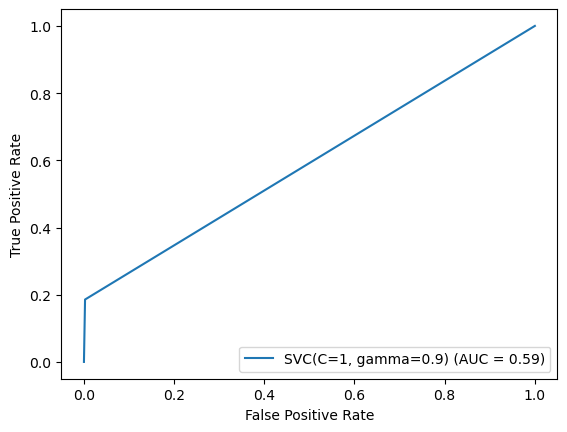

In [149]:
display.plot()

# Saving the model

In [150]:
import joblib
joblib.dump(Final_model,'Red_Wine_Quality_Final.pkl')

['Red_Wine_Quality_Final.pkl']